# FTP

In [1]:
_FTP_ = 225
_PATH_ = '/home/caster/training_data'

# Load dependencies

In [10]:
%run -i training_functions.py

In [11]:
t_data = read_intervals(_PATH_, _FTP_)

t_data[:10].drop(['watts_std', 'watts_25', 'watts_50', 'watts_75', 'watts_max', 'temp', 'hr_max'], axis=1)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:58: RuntimeWarning: divide by zero encountered in double_scalars


,filename,epoch_day,time,cad,hr,hr_min,hr_drift,km,kph,kilojoules,watts,np,alt,vi,tss,if,training_type
0,2017_02_18_11_13_04.utf8.json,17215,118,62.952481,151.204584,104,-0.233592,51.11070,25.871660,1064.2005,149.173045,227.744560,443.6,1.526714,199.065615,1.012198,Endurance
0,2017_02_22_17_33_49.utf8.json,17219,67,NaN,131.801924,90,NaN,24.28590,21.456039,NaN,NaN,NaN,390.6,NaN,NaN,NaN,NA
0,2017_03_07_17_47_18.utf8.json,17232,10,62.576433,137.426752,114,0.339606,4.69625,26.520306,93.3940,148.716561,216.195434,67.2,1.453741,16.014477,0.960869,Endurance
0,2017_03_07_17_47_18.utf8.json,17232,23,86.882497,171.672943,147,0.129740,18.93060,35.632825,310.9230,216.822176,234.398718,86,1.081064,39.934596,1.041772,FTP
0,2017_03_07_17_47_18.utf8.json,17232,46,71.348523,155.900576,126,-0.014478,37.26620,23.778161,400.1225,144.136347,235.856360,188.2,1.636342,80.365871,1.048250,Endurance
0,2017_03_10_17_46_57.utf8.json,17235,4,61.197761,138.582090,118,0.002620,0.91421,12.047118,42.8330,159.824627,221.239447,39.6,1.384264,6.555243,0.983286,Endurance
0,2017_03_10_17_46_57.utf8.json,17235,26,61.663425,145.644605,115,0.082763,23.27900,30.088589,174.7355,109.620765,186.888240,72.6,1.704862,35.993291,0.830614,Active recovery
0,2017_03_10_17_46_57.utf8.json,17235,20,80.738372,174.304817,138,0.146455,9.96009,26.927528,269.7650,224.057309,236.577337,158.6,1.055879,35.048494,1.051455,FTP
0,2017_03_11_17_34_54.utf8.json,17236,87,68.018194,135.779672,102,-0.012015,34.94850,23.891792,749.9425,142.873404,181.344455,501.2,1.269267,116.866426,0.805975,Endurance
0,2017_03_17_18_00_29.utf8.json,17242,16,81.361111,175.579293,157,0.178841,25.67930,38.147976,232.4320,234.779798,257.933357,39.6,1.098618,30.569879,1.146370,FTP


# Clustering

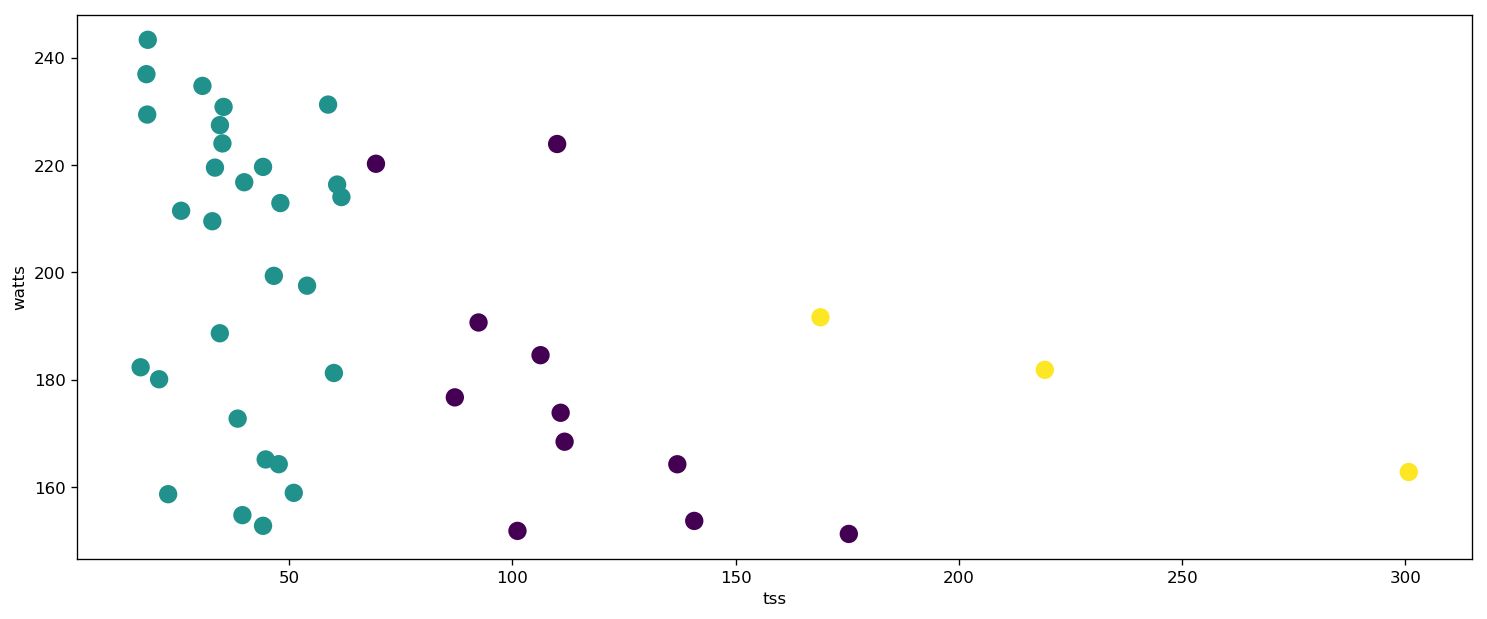

,time,hr,hr_drift,kilojoules,watts,watts_std,np,alt,vi,tss,if,c
0,72.545455,148.721152,0.037503,761.262591,178.147029,67.487686,211.755725,517.836364,1.203026,112.890701,0.941137,0.0
0,23.689655,159.921635,0.075903,284.462103,201.221455,54.579263,223.590284,172.786207,1.123956,38.492032,0.993735,1.0
0,140.333333,145.323629,0.073566,1489.703667,178.776392,70.045409,220.913697,998.333333,1.242634,229.647442,0.981839,2.0


In [13]:
from sklearn import cluster
import matplotlib.pyplot as plt

def cluster_it(cur, x_value, y_value, clusters):
    cur = cur[cur['training_type'] != 'Active Recovery']
    x_ = cur[x_value]
    y_ = cur[y_value]

    k_means = cluster.KMeans(n_clusters=clusters)
    temp = cur.drop(['filename', 'kph', 'watts_75', 'watts_25', 'watts_50', 'km', 'watts_max', 
                     'hr_min', 'training_type'], axis=1)
    k_means.fit(temp)

    temp = temp.assign(c=k_means.labels_)

    # Plot
    plt.figure(figsize=(15, 6), dpi=120)
    plt.scatter(x_, y_, c=temp['c'], linewidths=5)
    plt.xlabel(x_value)
    plt.ylabel(y_value)
    plt.show()

    # Describe dataframe
    return temp
          
cur = t_data[t_data['watts'] >= 150]
cur = cur[cur['time'] >= 10]

n_clusters = 3
temp = cluster_it(cur, 'tss', 'watts', n_clusters)

result = pd.concat([pd.DataFrame(temp[temp['c'] == cluster].mean()).transpose() for cluster in range(0,n_clusters)])

result.drop(['cad', 'epoch_day', 'hr_max', 'temp'], axis=1)

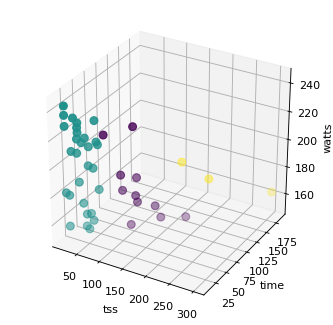

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5), dpi=80)

ax = fig.add_subplot(111, projection='3d')

temp = temp[['tss', 'watts', 'time', 'c']]

ax.scatter(temp['tss'], temp['time'], temp['watts'], c=temp['c'], s=50)

ax.set_xlabel('tss')
ax.set_ylabel('time')
ax.set_zlabel('watts')

plt.show()